In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

nodes = pd.read_csv("https://yeatmanlab.github.io/AFQBrowser-demo/data/nodes.csv")
gb = nodes.groupby(["tractID", "subjectID", "nodeID"])
import numpy as np

In [3]:
ad = gb['ad']

In [6]:
arr_ad = np.array(ad.mean())

In [9]:
arr_ad = arr_ad.reshape((77, 2000))
arr_imp = imputer.fit_transform(arr_ad)

In [17]:
arr_imp.shape

(77, 2000)

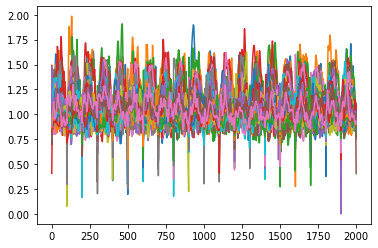

In [10]:
plt.plot(arr_imp[:,:].T)

In [11]:
arr_imp.shape

(77, 2000)

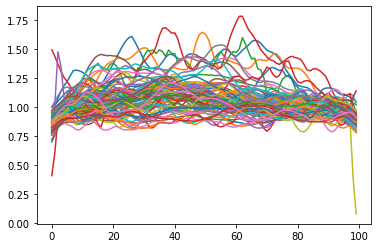

In [12]:
plt.plot(arr_imp[:,0:100].T)

In [13]:
from sklearn.decomposition import NMF
model = NMF(n_components=2,init='random', random_state=0)
W = model.fit_transform(arr_imp[:,0:100])
H = model.components_

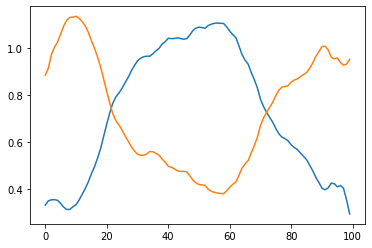

In [15]:
plt.plot(H.T)

In [16]:
H.shape

(2, 100)

In [18]:
arr_3d = arr_imp.reshape(77, 20, 100)

In [19]:
def Average(lst):
    return sum(lst) / len(lst)

In [20]:
arr_1 = Average(arr_3d[0, 0, :])

In [21]:
arr_1 # average value of a bundle in one patient 

1.2739810139250698

In [23]:
avg = np.zeros(20)
for i in range(20):
    avg[i] = Average(arr_3d[0, i, :])